In [6]:
import pandas as pd

agung = pd.read_csv(r'D:\Rakamin_github\business-understanding\Supplement_Sales_Forecast.csv')
agung.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


WOMart adalah jaringan ritel terkemuka di bidang nutrisi dan suplemen kesehatan, yang menawarkan berbagai produk mulai dari vitamin, suplemen olahraga, hingga nutrisi pendukung keseharian pelanggan. Sejak berdiri, WOMart menerapkan strategi distribusi multi-channel menggabungkan toko fisik dan platform online sehingga cakupan pasarnya meluas ke lebih dari 100 kota dengan lebih dari 350 gerai aktif. Dengan varian produk lengkap dan lokasi yang mudah dijangkau, WOMart bertujuan menjadi “one-stop shop” bagi kebutuhan wellness maupun fitness pelanggan.

In [5]:
print(agung['Store_id'].min())
print(agung['Store_id'].max())

1
365


In [ ]:
print(agung)

In [9]:
order_by_holiday = agung.groupby('Holiday')['#Order'].sum()

WOMART memiliki banyak toko retail diseluruh kota, namun alih alih top-of-mind brand dengan jumlah order yang stabil di setiap harinya, WOMART dihadapkan dengan masalah utama yaitu jumlah penjualan yang cenderung lebih sedikit pada hari libur dibandingkan dengan hari kerja. Order pada hari kerja 8x lipat lebih banyak dibanding hari libur (11,4 jt vs 1,4 jt).

In [10]:
print(order_by_holiday)

Holiday
0    11425695
1     1420165
Name: #Order, dtype: int64


In [13]:
ins1 = agung.groupby('Holiday')['#Order'].mean().reset_index()
print(ins1)

   Holiday     #Order
0        0  69.873379
1        1  57.218574


“ Rata rata jumlah order pada hari libur yaitu sebesar 57 unit dan pada hari kerja sebesar 69 unit dimana terdapat selisih 18%  lebih rendah pada hari libur”

In [15]:
ins2 = agung.groupby(['Store_Type', 'Holiday'])['#Order'].mean().unstack()
print(ins2)

Holiday              0          1
Store_Type                       
S1           59.424289  48.784114
S2           41.414262  34.270221
S3           75.470331  61.758885
S4          104.955407  85.509584


“ Rata rata jumlah order pada tipe toko S4 memiliki nilai tertinggi diantara tipe toko lainnya, sedangkan tipe toko S2 memilki jumlah order terendah diantara tipe toko lainnya”

## PLOT

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_25164\3389574731.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_order = gemeter.resample('M', on='Date')['#Order'].mean()


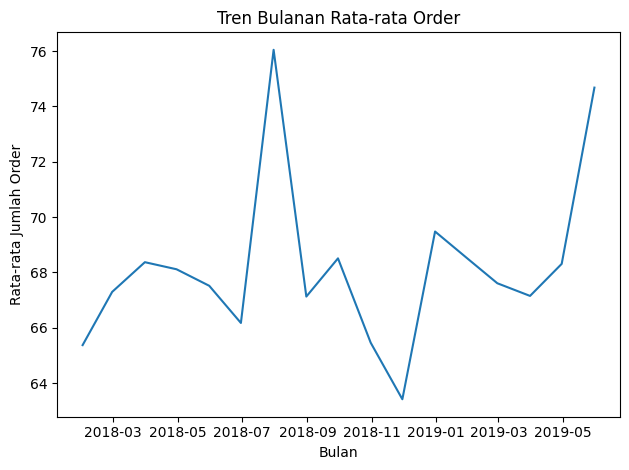

In [31]:
gemeter = pd.read_csv('Supplement_Sales_Forecast.csv', parse_dates=['Date'])

monthly_avg_order = gemeter.resample('M', on='Date')['#Order'].mean()

plt.figure()
plt.plot(monthly_avg_order.index, monthly_avg_order.values)
plt.title('Tren Bulanan Rata-rata Order')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Order')
plt.tight_layout()
plt.show()


In [30]:
gemeter['Month'] = gemeter['Date'].dt.to_period('M').dt.to_timestamp()


monthly_summary = (
    gemeter.groupby(['Month', 'Holiday'])['#Order']
      .mean()
      .reset_index()
      .pivot(index='Month', columns='Holiday', values='#Order')
      .reset_index()
)


monthly_summary.columns = ['Month', 'Avg_Order_Workday', 'Avg_Order_Holiday']

print(monthly_summary)


        Month  Avg_Order_Workday  Avg_Order_Holiday
0  2018-01-01          67.294942          55.379726
1  2018-02-01          66.682630          72.419178
2  2018-03-01          71.018411          57.342009
3  2018-04-01          68.816860          63.555479
4  2018-05-01          67.803744          58.942466
5  2018-06-01          67.025342          54.257534
6  2018-07-01          75.945297          79.156164
7  2018-08-01          69.925395          52.584658
8  2018-09-01          69.522476          59.397260
9  2018-10-01          68.587329          54.737769
10 2018-11-01          70.845205          42.987329
11 2018-12-01          71.736514          36.757534
12 2019-01-01          70.043098          60.440000
13 2019-02-01          67.406955          70.245205
14 2019-03-01          69.596956          50.648630
15 2019-04-01          69.420488          64.663796
16 2019-05-01          75.105479          70.731507


“ Pada hari libur di bulan bulan tertentu terdapat penurunan jumlah order yang signifikan terutama pada libur panjang yaitu pada bulan september hingga desember . Namun pada bulan februari dan juli jumlah order pada hari libur lebih tinggi ketimbang hari kerja”

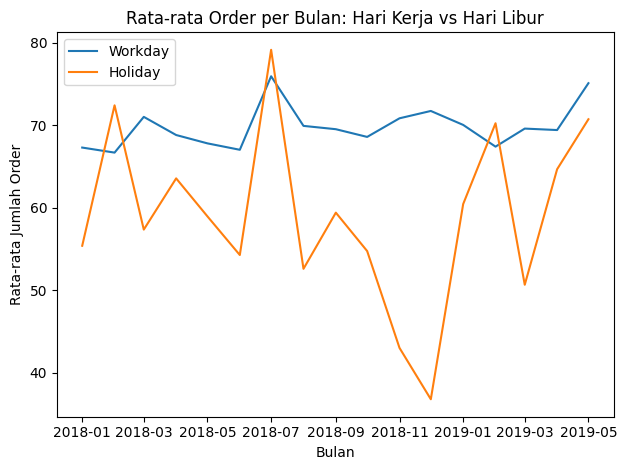

In [28]:
gemeter['Month'] = gemeter['Date'].dt.to_period('M').dt.to_timestamp()
monthly = (
    gemeter.groupby(['Month', 'Holiday'])['#Order']
      .mean()
      .reset_index()
      .pivot(index='Month', columns='Holiday', values='#Order')
)
monthly.columns = ['Avg_Order_Workday', 'Avg_Order_Holiday']


plt.figure()
plt.plot(monthly.index, monthly['Avg_Order_Workday'], label='Workday')
plt.plot(monthly.index, monthly['Avg_Order_Holiday'], label='Holiday')
plt.title('Rata-rata Order per Bulan: Hari Kerja vs Hari Libur')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Order')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

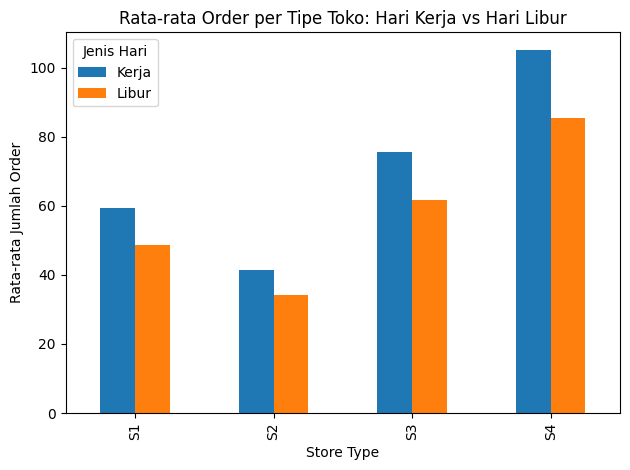

In [23]:
ins2 = agung.groupby(['Store_Type', 'Holiday'])['#Order'].mean().unstack()


ins2 = ins2.rename(columns={0: 'Kerja', 1: 'Libur'})


plt.figure()
ins2.plot(kind='bar')
plt.title('Rata-rata Order per Tipe Toko: Hari Kerja vs Hari Libur')
plt.xlabel('Store Type')
plt.ylabel('Rata-rata Jumlah Order')
plt.legend(title='Jenis Hari')
plt.tight_layout()
plt.show()


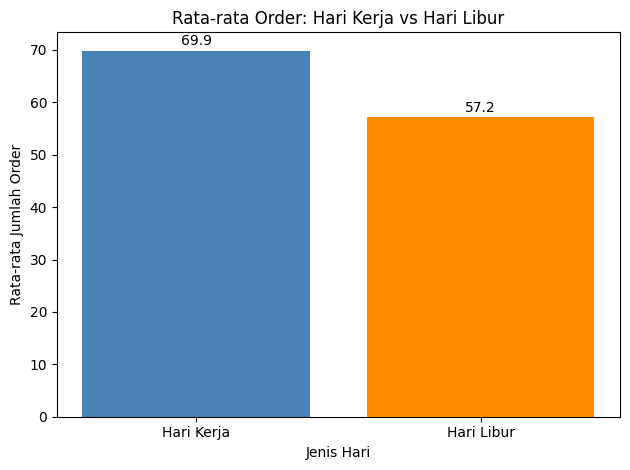

In [29]:
ins1 = gemeter.groupby('Holiday')['#Order'].mean().reset_index()


labels = ins1['Holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})
values = ins1['#Order']


colors = ['steelblue', 'darkorange']


plt.figure()
positions = range(len(labels))
plt.bar(positions, values, color=colors)
plt.xticks(positions, labels)
plt.title('Rata-rata Order: Hari Kerja vs Hari Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Order')


for pos, val in zip(positions, values):
    plt.text(pos, val + 1, f'{val:.1f}', ha='center')

plt.tight_layout()
plt.show()
